Пусть нам даны свединя об 3 аэропортах в Нью-Йорке за 2013 год также свединия о погоде за 2013 год. Мы исследуем зависимость задержек рейсов от различных факторов.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
df = pd.read_csv(url, index_col=0)
df.head(10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


In [13]:
url1 = 'https://psv4.userapi.com/c848024/u75871794/docs/d15/b525149d9f09/weather.txt?extra=wVG8ifpsHG5XzTJ4bjl29tt9tuz_7KD1GPa4fEB_cFFPeW2CfY2O_VBFEjyosbu4PLzQhboXkTd-RClrMMmTP4zqo7fuCYIBFNYKE0HbOsOA3mJmkoaAoYb82x-ydzB_N_bBubdZhlaOmhFaSk-fDg&dl=1'
w = pd.read_csv(url1, index_col = 0)
w.head(10)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
1,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
2,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
3,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
4,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
5,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
6,EWR,2013,1,1,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
7,EWR,2013,1,1,7,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
8,EWR,2013,1,1,8,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
9,EWR,2013,1,1,9,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
10,EWR,2013,1,1,10,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


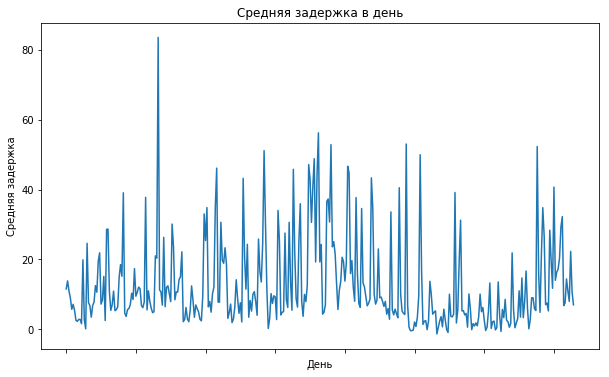

In [71]:
#Средняя задержка по дням за год
plt.figure(figsize=(10,6))
df.groupby(['month', 'day'])['dep_delay'].mean().plot()
plt.title('Средняя задержка в день')
plt.xlabel('День')
plt.ylabel('Средняя задержка')
plt.show()

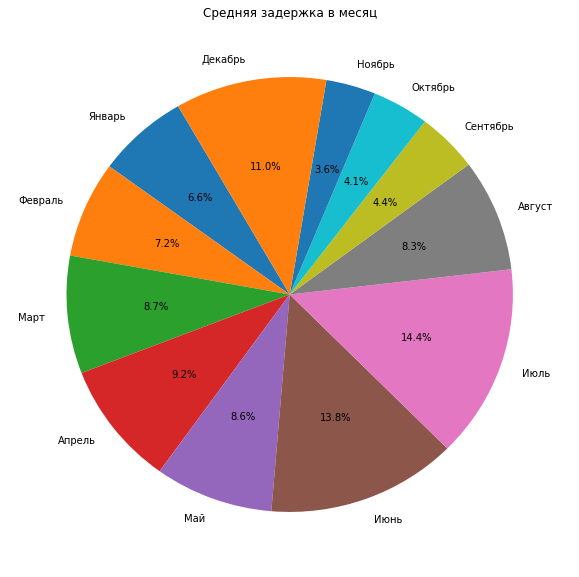

In [18]:
#Средняя задержка по месяцам за год
labels = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']
plt.figure(figsize=(10,10))
m = df.groupby('month')['dep_delay'].mean()
plt.pie(m, labels = labels, autopct='%1.1f%%', startangle=120)
plt.title('Средняя задержка в месяц')
plt.show()

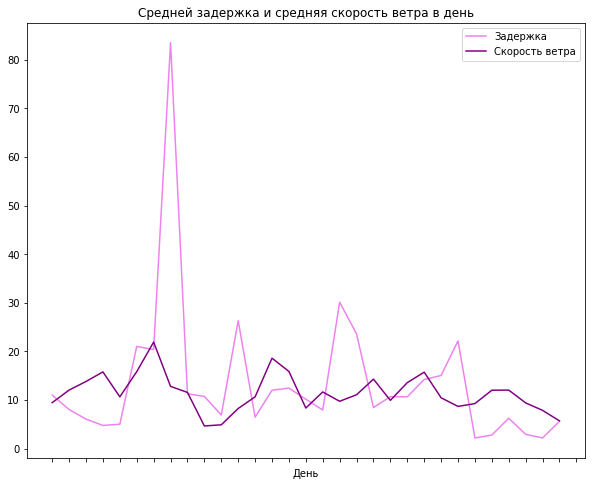

In [26]:
#Сравнение средней задержки и средней скорости ветра в марте (аналогично для других месяцов)
plt.figure(figsize=(10,8))
df[df['month']==3].groupby(['month', 'day'])['dep_delay'].mean().plot(color = 'violet', label = 'Задержка')
w[w['month']==3].groupby(['month', 'day'])['wind_speed'].mean().plot(color = 'purple', label = 'Скорость ветра')
plt.xticks(range(32))
plt.legend()
plt.title('Средняя задержка и средняя скорость ветра в день')
plt.xlabel('День')
plt.show()

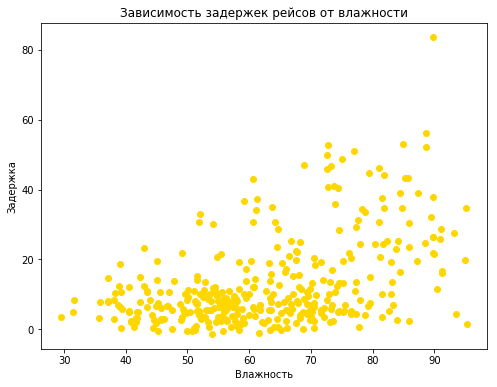

In [55]:
#Зависимость задержек от влажности
plt.figure(figsize=(8,6))
plt.scatter(w.groupby(['month','day'])['humid'].mean(), df.groupby(['month','day'])['dep_delay'].mean()[0:364], color = 'gold')
plt.title('Зависимость задержек рейсов от влажности')
plt.xlabel('Влажность')
plt.ylabel('Задержка')
plt.show()

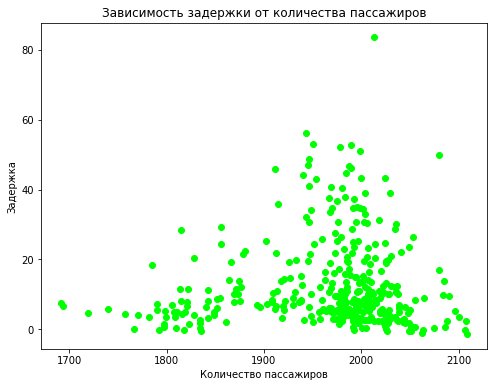

In [68]:
#Зависимость задержки от количества пассажиров на борту
plt.figure(figsize=(8,6))
plt.scatter(df.groupby(['month','day'])['flight'].mean()[0:364], df.groupby(['month','day'])['dep_delay'].mean()[0:364], color = 'lime')
plt.title('Зависимость задержки от количества пассажиров')
plt.xlabel('Количество пассажиров')
plt.ylabel('Задержка')
plt.show()

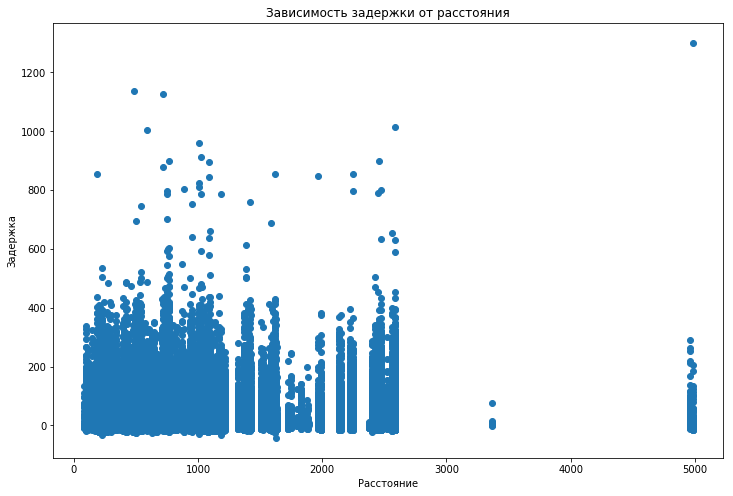

In [56]:
#Задержка вылета не зависит от расстояния полета
plt.figure(figsize=(12,8))
plt.scatter(df['distance'], df['dep_delay'])
plt.title('Зависимость задержки от расстояния')
plt.xlabel('Расстояние')
plt.ylabel('Задержка')
plt.show()

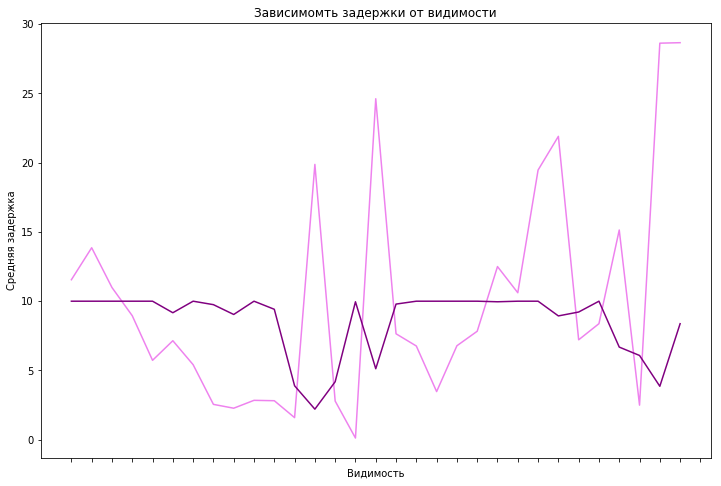

In [42]:
#Задержка вылета в зависимости от видимости в Январе(аналогично для остальных месяцов)
plt.figure(figsize=(12,8))
df[df['month']==1].groupby(['month', 'day'])['dep_delay'].mean().plot(color = 'violet', label = 'Задержка')
w[w['month']==1].groupby(['month', 'day'])['visib'].mean().plot(color = 'purple', label = 'Видимость')
plt.xticks(range(32))
plt.title('Зависимомть задержки от видимости')
plt.xlabel('Видимость')
plt.ylabel('Средняя задержка')
plt.show()

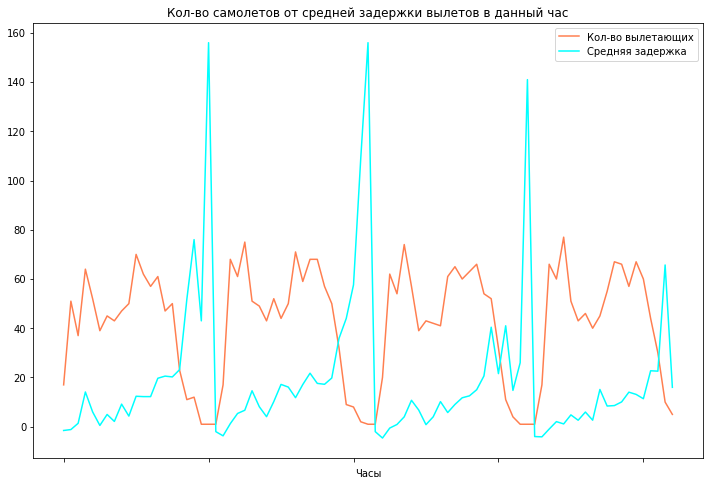

In [69]:
#Зависимость количества самолетов, вылетающих в конкретный час, от средней задержки вылетов в данный час
plt.figure(figsize=(12,8))
df[df.month==1][df[df.month==1].day<=4].groupby(['day','hour'])['dep_delay'].count().plot(color = 'coral', label = 'Кол-во вылетающих')
df[df.month==1][df[df.month==1].day<=4].groupby(['day','hour'])['dep_delay'].mean().plot(color = 'aqua', label = 'Средняя задержка')
plt.legend()
plt.title('Кол-во самолетов от средней задержки вылетов в данный час')
plt.xlabel('Часы')
plt.show()

Вылеты по аэропортам


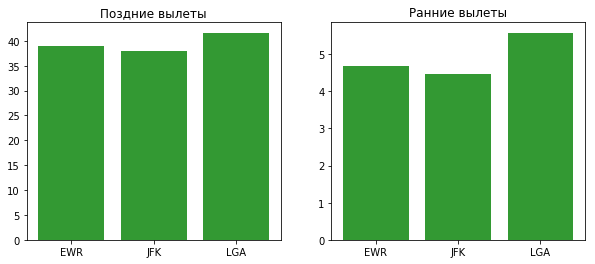

In [72]:
#Среднее значение поздних и ранних вылетов по трём аэропортам
plt.figure(figsize=(10,4))
a=df[df.dep_delay > 0].groupby('origin')['dep_delay'].mean()
b=df[df.dep_delay < 0].groupby('origin')['dep_delay'].mean()
print('Вылеты по аэропортам')
plt.subplot(1,2,1)
plt.bar(np.arange(3), a, alpha=0.8, color = 'green')
plt.xticks(np.arange(3), ('EWR','JFK','LGA'))
plt.title('Поздние вылеты')
plt.subplot(1,2,2)
plt.bar(np.arange(3), b.abs(), alpha=0.8, color = 'green')
plt.xticks(np.arange(3), ('EWR','JFK','LGA'))
plt.title('Ранние вылеты')
plt.show()

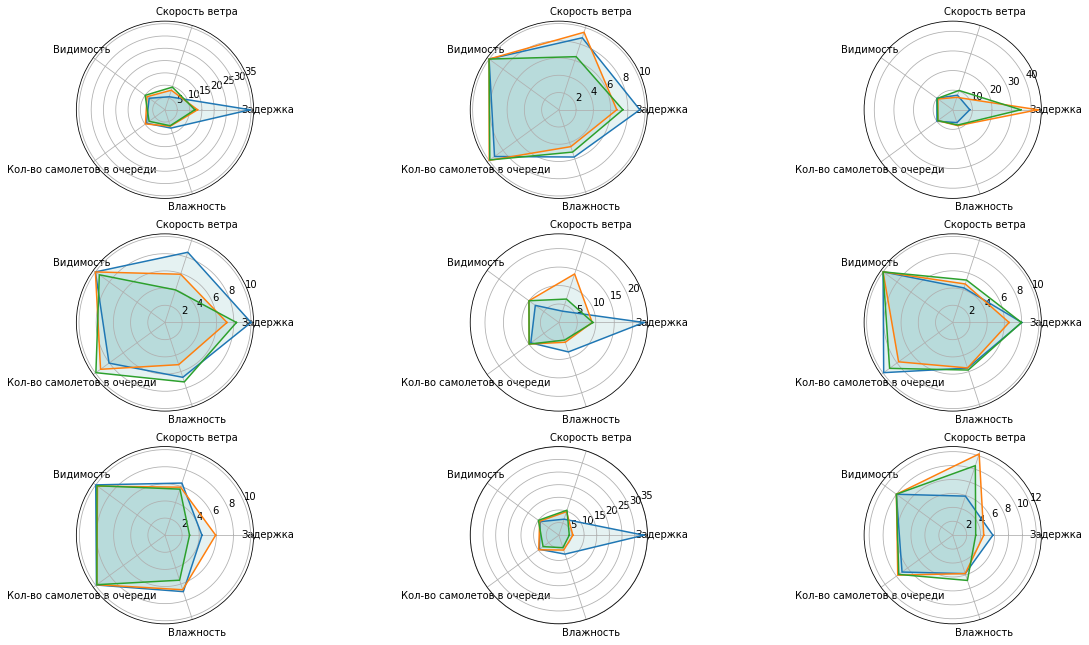

In [58]:
#Диаграммы зависимости задержки рейсов от скорости ветра, видимости, количества самолетов в очереди на вылет, влажности.
#Для компактности на каждом из графиков изображено по 3 дня
import math
depde=df.groupby(['month', 'day'])['dep_delay'].mean()
winds=w.groupby(['month', 'day'])['wind_speed'].mean()
visib=w.groupby(['month','day'])['visib'].mean()
depd=df.groupby(['month','day'])['dep_delay'].count()
humid=w.groupby(['month','day'])['humid'].mean()
angles=[n/float(5)*2*math.pi for n in range(5)]
angles+=angles[:1]
plt.figure(figsize=(20,15))
i=8
for k in range(1,10):
    plt.subplot(4,3,k, polar=True)
    plt.xticks(angles[:-1], ['Задержка','Скорость ветра','Видимость','Кол-во самолетов в очереди','Влажность'])
    for l in range(1,4):
        j=(k-1)*3+l
        val=[depde[i][j], winds[i][j], visib[i][j], depd[i][j]/100, humid[i][j]/10, depde[i][j]]
        plt.plot(angles,val)
        plt.fill(angles, val, 'teal', alpha=0.1)
plt.show()

После построения и анализирования графиков, поведем итоги:
1)Средняя задержка/день в течение года колеблется от 0 до 80 минут/день. Но средняя задержка/день чаще всего не превосходит 60 минут/день.
2)Рассматривая время задержки в каждом рейсе, можно отметить, что, оно с большой вероятностью находится в промежутке от 0 до 400 минут.
3)Максимальное значение средней задержки/день наблюдается в июне, июле и декабре.
4)Из посторенных графиков следует, что средняя задержка зачительно зависит от скорости ветра, т.е. чем выше скорость, тем дольше задержка.
5)Исследование задержек рейсов по трем различным аэропортам Нью-Йорка позволяет сделать вывод, что самые непунктуальные (смотрим вылеты самолетов) в аэропорту LGA.
6)А также можно заметить, что врямы задержки не зависит от расстояния полета.
7)При видимости стремящейся к нулю, резко возврастает время задержки.
8)Средняя задержка вылетов в данный час прямо пропорционально кол-ву самолетов, вылетающих в конкретный час, т.е. чем больше количество вылетов, тем больше средняя задержка в конкретный час. Задержка накапливается все больше и больше и, следовательно, к концу дня она максимальна (именно в этот день).Затем задержкаопускается практически до 0 (ночью), т.к. ночью количество вылетов на много ниже.
9)Если влажность небольшая, то и задержки сравнительно небольшие, а при увеличении влажности колебание средних задержек увеличивается.
Собрав все данные воедино, мы наглядно показали на последнем графике зависимость задержки рейсов от таких факторов как: скорость ветра, видимость, количество самолетов в очереди на вылет, влажность. Очевидно,что мы перечислили не все зависимости, а лишь только малую часть. В основном работа проводилась на базе метеорологических данных, но это не плохо, ибо вывели несколько значительных проблем с задержкой рейсов.